In [1]:
import matplotlib.pyplot as plt
import json
import itertools
import re
import pandas as pd
import numpy as np

In [5]:

speed = [5704,10716,29380,156900]
result = {}
# for packet stats
loop = 80
time = 7200
# set the packet generation period to 15s to simulate the normal traffic
# read the stats from json
# simulation period 7200
# MAC_QUEUE_SIZE: 5
# MAC_KEEPALIVE_TIMEOUT_S: 0
# MAC_DESYNC_THRESHOLD_S: 0
# APP_PACKET_PERIOD_SEC: 3
for i in range(len(speed)):
    title = '{}'.format(speed[i])
    result[title] = {}
    result[title]["app-packets-sent"] = []
    result[title]["app-packets-received"] = []
    result[title]["PDR_in_percent"] = []
    result[title]["latency"] = []
    result[title]["app-packets-lost"] = []
    result[title]["current-consumed-after-joining"] = []
    result[title]["current-consumed"] = []
    
    for j in range(loop):
        with open('./examples/mesh/results/single_model_normal_traffic_raw_stats/{}s-{}-{}/stats.json'.format(time,speed[i],j),'r') as f:
            data = json.load(f)
            result[title]["app-packets-sent"].append(float(data["global-stats for this duration"]["app-packets-sent"][0]["total"]))
            result[title]["app-packets-received"].append(float(data["global-stats for this duration"]["app-packets-received"][0]["total"]))
            result[title]["app-packets-lost"].append(float(data["global-stats for this duration"]["app-packets-lost"][0]["total"]))
            result[title]["PDR_in_percent"].append(float(data["global-stats for this duration"]["e2e-delivery"][0]["value"]))
            result[title]["latency"].append(float(data["global-stats for this duration"]["e2e-latency"][0]["mean"]))
            result[title]["current-consumed"].append(float(data["global-stats for this duration"]["current-consumed"][0]["mean"]))
            result[title]["current-consumed-after-joining"].append(float(data["global-stats for this duration"]["current-consumed-when-joined"][0]["mean"]))
    #print(result[title])
    
# for link stats
for i in range(len(speed)):
    title = '{}'.format(speed[i])
    result[title]["PAR"] = []
    result[title]["tx"] = []
    result[title]["acked"] = []
    for j in range(loop):
        with open('./examples/mesh/results/single_model_normal_traffic_raw_stats/{}s-{}-{}/log.txt'.format(time,speed[i],j),'r') as f: 
            text = f.read()
            result[title]["PAR"].append(float(re.findall('PAR=(.+)% tx=.+ acked=.+',text)[0]))
            result[title]["tx"].append(float(re.findall('PAR=.+% tx=(.+) acked=.+',text)[0]))
            result[title]["acked"].append(float(re.findall('PAR=.+% tx=.+ acked=(.+)',text)[0]))

'''for i in range(len(speed)):
    title = '{}'.format(speed[i])
    print(np.mean(result[title]["acked"]))
    print(np.mean(result[title]["tx"]))
    print(np.mean(result[title]["PAR"]))'''

'for i in range(len(speed)):\n    title = \'{}\'.format(speed[i])\n    print(np.mean(result[title]["acked"]))\n    print(np.mean(result[title]["tx"]))\n    print(np.mean(result[title]["PAR"]))'

In [6]:
# write into a file for save
json_str = json.dumps(result)
with open('./examples/mesh/single_model_result/single_model_stats.json','w') as f:
    f.write(json_str)

    bitrate      value
0  1000kbps  68.074962
1   250kbps  67.135050
2    50kbps  63.724825
3     8kbps  68.878187


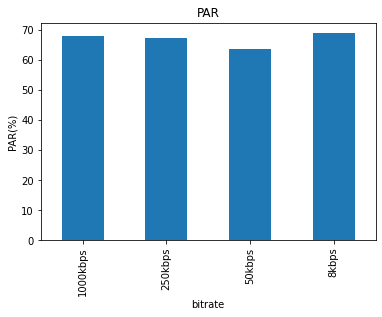

In [7]:
# PAR for 3s packet generation period
# bar plot
with open('./examples/mesh/single_model_result/single_model_stats.json','r') as f:
    result = json.load(f)
data = [
        ['1000kbps',np.mean(result['5704']['PAR'])],
        ['250kbps',np.mean(result['10716']['PAR'])],
        ['50kbps',np.mean(result['29380']['PAR'])],
        ['8kbps',np.mean(result['156900']['PAR'])],
]
df = pd.DataFrame(data,columns=['bitrate','value'])
print(df)
PAR_fig = df.plot(x='bitrate',y='value',kind='bar',title="PAR",xlabel='bitrate',ylabel='PAR(%)',legend=False)
PAR_fig.set_xlabel('bitrate')
PAR_fig = PAR_fig.get_figure()
PAR_fig.savefig('./examples/mesh/single_model_result/PAR_fig.pdf')
#plt.grid(linestyle="--", alpha=0.3)
plt.show()

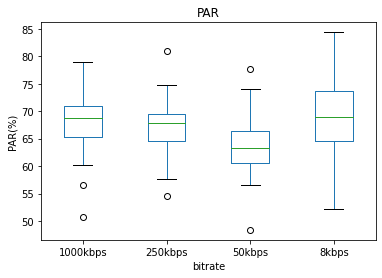

In [8]:
# PAR for 3s packet generation period
# box plot
with open('./examples/mesh/single_model_result/single_model_stats.json','r') as f:
    result = json.load(f)
data = {
        '1000kbps':result['5704']['PAR'],
        '250kbps':result['10716']['PAR'],
        '50kbps':result['29380']['PAR'],
        '8kbps':result['156900']['PAR'],
}
df = pd.DataFrame(data)
PAR_fig_box = df.plot.box(title="PAR",ylabel='PAR(%)')
PAR_fig_box.set_xlabel('bitrate')
PAR_fig_box = PAR_fig_box.get_figure()
PAR_fig_box.savefig('./examples/mesh/single_model_result/PAR_fig_box.pdf')
#plt.grid(linestyle="--", alpha=0.3)
plt.show()

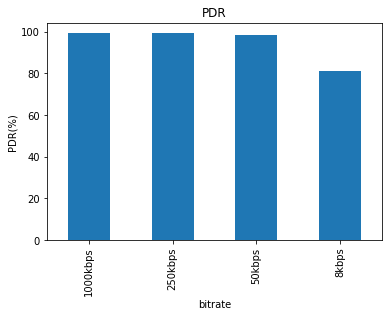

In [9]:
# PDR  for 3s packet generation period
# bar plot 
with open('./examples/mesh/single_model_result/single_model_stats.json','r') as f:
    result = json.load(f)
data = [       
        ['1000kbps',np.mean(result['5704']['PDR_in_percent'])],
        ['250kbps',np.mean(result['10716']['PDR_in_percent'])],
        ['50kbps',np.mean(result['29380']['PDR_in_percent'])],
        ['8kbps',np.mean(result['156900']['PDR_in_percent'])],
]
df = pd.DataFrame(data,columns=['bitrate','value'])
PDR_fig = df.plot(x='bitrate',y='value',kind='bar',title="PDR",xlabel='bitrate',ylabel='PDR(%)',legend=False)
#PDR_fig.set_xlabel('bitrate')
PDR_fig = PDR_fig.get_figure()
PDR_fig.savefig('./examples/mesh/single_model_result/PDR_fig.pdf',bbox_inches = 'tight')
#plt.grid(linestyle="--", alpha=0.3)
plt.show()

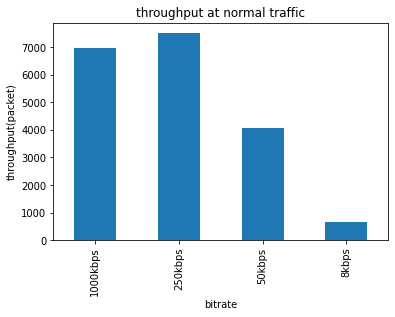

In [7]:
# throughput normal traffic (3s)
# at 250kbps, the throughput is higher compared with 1000kbps
# because the link quality is worse for 1000kbps, some packets get dropped
# after reaching max retransmission try

with open('./examples/mesh/single_model_result/single_model_stats.json','r') as f:
    result = json.load(f)
data = [       
        ['1000kbps',np.mean(result['5704']["app-packets-received"])],
        ['250kbps',np.mean(result['10716']["app-packets-received"])],
        ['50kbps',np.mean(result['29380']["app-packets-received"])],
        ['8kbps',np.mean(result['156900']["app-packets-received"])],
]
df = pd.DataFrame(data,columns=['bitrate','value'])
throughput_normal = df.plot(x='bitrate',y='value',kind='bar',title="throughput at normal traffic",xlabel='bitrate',ylabel='throughput(packet)',legend=False)
#PDR_fig.set_xlabel('bitrate')
throughput_normal = throughput_normal.get_figure()
throughput_normal.savefig('./examples/mesh/single_model_result/throughput_normal.pdf',bbox_inches = 'tight')
#plt.grid(linestyle="--", alpha=0.3)
plt.show()

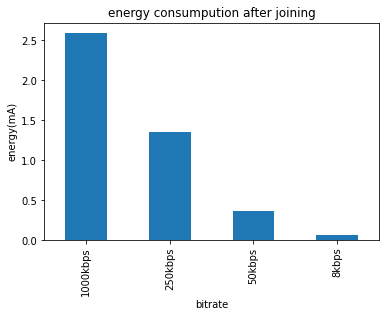

In [8]:
# energy consumption (after joined)
# normal traffic
with open('./examples/mesh/single_model_result/single_model_stats.json','r') as f:
    result = json.load(f)
data = [
        ['1000kbps',np.mean(result['5704']['current-consumed-after-joining'])],
        ['250kbps',np.mean(result['10716']['current-consumed-after-joining'])],
        ['50kbps',np.mean(result['29380']['current-consumed-after-joining'])],
        ['8kbps',np.mean(result['156900']['current-consumed-after-joining'])],
]
df = pd.DataFrame(data,columns=['bitrate','value'])
energy_after_joined_fig = df.plot(x='bitrate',y='value',kind='bar',title="energy consumpution after joining",xlabel='bitrate',ylabel='energy(mA)',legend=False)
energy_after_joined_fig.set_xlabel('bitrate')
energy_after_joined_fig = energy_after_joined_fig.get_figure()
energy_after_joined_fig.savefig('./examples/mesh/single_model_result/energy_after_joined_fig.pdf',bbox_inches = 'tight')
#plt.grid(linestyle="--", alpha=0.3)
plt.show()

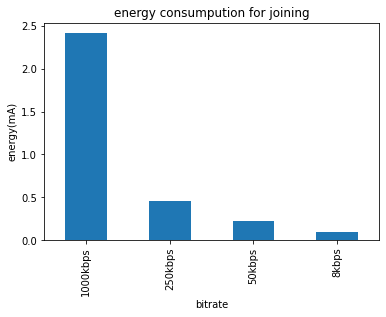

In [9]:
# energy consumption (for joining)
# normal traffic
with open('./examples/mesh/single_model_result/single_model_stats.json','r') as f:
    result = json.load(f)
data = [
        ['1000kbps',np.mean(result['5704']['current-consumed'])-np.mean(result['5704']['current-consumed-after-joining'])],
        ['250kbps',np.mean(result['10716']['current-consumed'])-np.mean(result['10716']['current-consumed-after-joining'])],
        ['50kbps',np.mean(result['29380']['current-consumed'])-np.mean(result['29380']['current-consumed-after-joining'])],
        ['8kbps',np.mean(result['156900']['current-consumed'])-np.mean(result['156900']['current-consumed-after-joining'])],
]
df = pd.DataFrame(data,columns=['bitrate','value'])
energy_joining_fig = df.plot(x='bitrate',y='value',kind='bar',title="energy consumpution for joining",xlabel='bitrate',ylabel='energy(mA)',legend=False)
energy_joining_fig.set_xlabel('bitrate')
energy_joining_fig = energy_joining_fig.get_figure()
energy_joining_fig.savefig('./examples/mesh/single_model_result/energy_joining.pdf',bbox_inches = 'tight')
#plt.grid(linestyle="--", alpha=0.3)
plt.show()

In [10]:
# throughput
# set the packet generation period to 0.3s to simulate the peak throughput
time = 1100 - 100 # 100 : warmup time
loop1 = 30
speed = [5704,10716,29380,156900]
time = 7200
result_peak_throughput = {}
for i in range(len(speed)):
    title = '{}'.format(speed[i])
    result_peak_throughput[title] = {}
    result_peak_throughput[title]["app-packets-received"] = []    
    result_peak_throughput[title]["PDR_in_percent"] = []
    for j in range(loop1):
        with open('./examples/mesh/results/single_model_peak_traffic_raw_stats/{}s-{}-{}/stats.json'.format(time,speed[i],j),'r') as f:
            data = json.load(f)
            result_peak_throughput[title]["PDR_in_percent"].append(float(data["part 1"]["global-stats for this duration"]["e2e-delivery"][0]["value"]))
            result_peak_throughput[title]["app-packets-received"].append(float(data["part 1"]["global-stats for this duration"]["app-packets-received"][0]["total"]))


In [11]:
# save the result
json_str_peak_throughput = json.dumps(result_peak_throughput)
with open('./examples/mesh/single_model_result/single_model_stats_peak_throughput_0_3s.json','w') as f:
    f.write(json_str_peak_throughput)
    

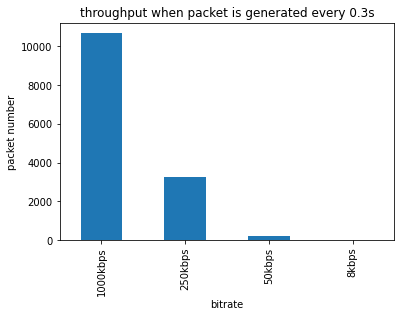

[['1000kbps', 10688.933333333332], ['250kbps', 3235.4666666666667], ['50kbps', 198.6], ['8kbps', 7.133333333333334]]


In [13]:
# plot the peak throughput
with open('./examples/mesh/single_model_result/single_model_stats_peak_throughput_0_3s.json','r') as f:
    result_peak_throughput = json.load(f)
data = [
        ['1000kbps',np.mean(result_peak_throughput['5704']["app-packets-received"])],
        ['250kbps',np.mean(result_peak_throughput['10716']["app-packets-received"])],
        ['50kbps',np.mean(result_peak_throughput['29380']["app-packets-received"])],
        ['8kbps',np.mean(result_peak_throughput['156900']["app-packets-received"])]
        ]
df = pd.DataFrame(data,columns=['bitrate','value'])
energy_joining_fig = df.plot(x='bitrate',y='value',kind='bar',title="throughput when packet is generated every 0.3s",xlabel='bitrate',ylabel='packet number',legend=False)
energy_joining_fig.set_xlabel('bitrate')
energy_joining_fig = energy_joining_fig.get_figure()
energy_joining_fig.savefig('./examples/mesh/single_model_result/throughput_peak.pdf',bbox_inches = 'tight')
#plt.grid(linestyle="--", alpha=0.3)
plt.show()
print(data)

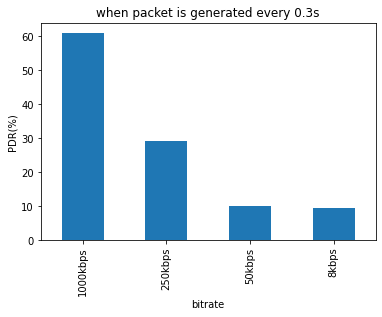

In [15]:
# PDR in percent
# for peak throughput APP packet period = 0.3
data = [
        ['1000kbps',np.mean(result_peak_throughput['5704']["PDR_in_percent"])],
        ['250kbps',np.mean(result_peak_throughput['10716']["PDR_in_percent"])],
        ['50kbps',np.mean(result_peak_throughput['29380']["PDR_in_percent"])],
        ['8kbps',np.mean(result_peak_throughput['156900']["PDR_in_percent"])]
        ]
df = pd.DataFrame(data,columns=['bitrate','value'])
energy_joining_fig = df.plot(x='bitrate',y='value',kind='bar',title="when packet is generated every 0.3s",xlabel='bitrate',ylabel='PDR(%)',legend=False)
energy_joining_fig.set_xlabel('bitrate')

energy_joining_fig = energy_joining_fig.get_figure()
energy_joining_fig.savefig('./examples/mesh/single_model_result/PDR_peak.pdf',bbox_inches = 'tight')
#plt.grid(linestyle="--", alpha=0.3)
plt.show()

In [ ]:
# PAR in high peak packet generation period
# the PAR will also get higher for extremely high generating period
# because of the nature of RB orchestra
# when the packet is extremely a lot compared with the period of slotframe as for RB each node will listen once,
# hence receiving one packet from the neighbour.
# the packets its neighbour sends will collide with each other, reducing the PAR also.